<a href="https://colab.research.google.com/github/GirijaKondapally/Girija_INFO5731_-Fall2023/blob/main/Girija_Kondapally_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Coherence Score for K=2: 0.3194665776025782
Coherence Score for K=3: 0.319466577602578
Coherence Score for K=4: 0.3194665776025781
Coherence Score for K=5: 0.31946657760257813


Coherence Score for K=6: 0.3194665776025781
Coherence Score for K=7: 0.3194665776025781
Coherence Score for K=8: 0.31946657760257813


Coherence Score for K=9: 0.31946657760257813
Coherence Score for K=10: 0.31946657760257813
Optimal number of topics (K): 2 with coherence score: 0.3194665776025782


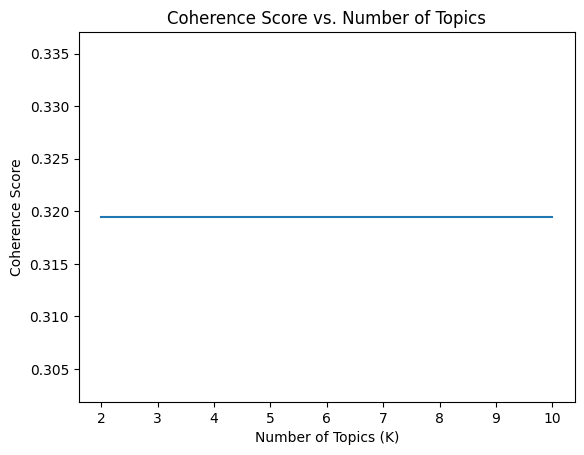

(0, '0.175*"movie" + 0.114*"watch" + 0.095*"could" + 0.093*"one" + 0.092*"average"')
(1, '0.226*"movie" + 0.131*"watch" + 0.085*"fabulous" + 0.082*"recommneded" + 0.082*"gona"')
Topic 0:
Keywords: movie, watch, could, one, average
Topic 1:
Keywords: movie, watch, fabulous, recommneded, gona


In [7]:
# Write your code here
sample_data= ["This movie is fabulous!!!. I am gona watch it again.",
    "This movie is a disaster. Not recommneded.",
    "This is movie an average movie. could be a one time watch."]
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Preprocessing
stop_words = set(stopwords.words('english'))
tokenized_data = [word_tokenize(doc.lower()) for doc in sample_data]
tokenized_data = [[word for word in doc if word.isalnum() and word not in stop_words] for doc in tokenized_data]

# Creating dictionary and corpus
dictionary = corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]

# Determine the optimal number of topics (K)
coherence_scores = []
for k in range(2, 11):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))
    print(f"Coherence Score for K={k}: {coherence_score}")

# Choose the K value with the highest coherence score
best_k, best_coherence = max(coherence_scores, key=lambda x: x[1])
print(f"Optimal number of topics (K): {best_k} with coherence score: {best_coherence}")

# Plot
k_values, coherence_scores = zip(*coherence_scores)
plt.plot(k_values, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Train the LDA model with the optimal K
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_k)

# Interpret the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

topics = lda_model.print_topics(num_words=5)
for topic_id, topic_words in topics:
    print(f"Topic {topic_id}:")
    words = [word for word, _ in lda_model.show_topic(topic_id, topn=5)]
    topic_definition = ", ".join(words)
    print(f"Keywords: {topic_definition}")





## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

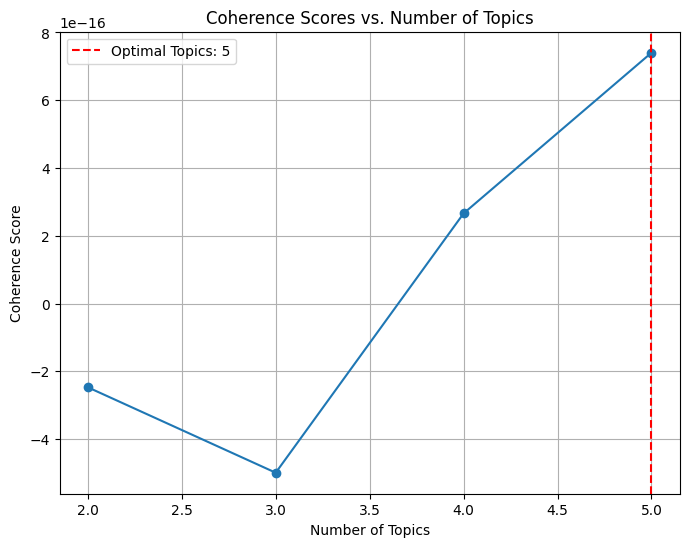

Optimal number of topics: 5
Topic 1: watch gona fabulous time average
Topic 2: recommneded disaster average time watch
Topic 3: gona fabulous recommneded disaster watch


In [9]:
# Write your code here
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Sample data
sample_data= ["This movie is fabulous!!!. I am gona watch it again.",
    "This movie is a disaster. Not recommneded.",
    "This is movie an average movie. could be a one time watch."
]

# Preprocessing
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

preprocessed_data = [preprocess_text(text) for text in sample_data]

# document-term matrix using TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.85, max_features=50, stop_words='english')
dtm = vectorizer.fit_transform(preprocessed_data)

# calculate coherence score
def calculate_coherence_score(lsa_model, dtm):
    # Calculate the cosine similarity between topic vectors
    topic_similarity = cosine_similarity(lsa_model.components_)

    coherence_score = 0
    for i in range(len(topic_similarity) - 1):
        for j in range(i + 1, len(topic_similarity)):
            # Calculate the cosine similarity between topic vectors i and j
            similarity_score = topic_similarity[i].dot(topic_similarity[j])
            coherence_score += similarity_score
    return coherence_score

# Determine the optimal number of topics based on coherence scores
coherence_scores = []
num_topics_range = range(2, 6)
for num_topics in num_topics_range:
    # Fit LSA
    lsa = TruncatedSVD(n_components=num_topics)
    dtm_lsa = lsa.fit_transform(dtm)

    # Calculate coherence score
    coherence_scores.append(calculate_coherence_score(lsa, dtm_lsa))

plt.figure(figsize=(8, 6))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.title("Coherence Scores vs. Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.grid(True)

# Determine the optimal number of topics
optimal_num_topics = num_topics_range[coherence_scores.index(max(coherence_scores))]
plt.axvline(x=optimal_num_topics, color='r', linestyle='--', label=f'Optimal Topics: {optimal_num_topics}')
plt.legend()

plt.show()
# Fit LSA with the optimal number of topics
lsa = TruncatedSVD(n_components=optimal_num_topics)
dtm_lsa = lsa.fit_transform(dtm)

# Get the most important words for each topic
terms = vectorizer.get_feature_names_out()
topic_words = []
for i, topic in enumerate(lsa.components_):
    top_words_idx = topic.argsort()[-5:][::-1]
    topic_words.append(' '.join([terms[idx] for idx in top_words_idx]))

print(f"Optimal number of topics: {optimal_num_topics}")
for i, words in enumerate(topic_words):
    print(f"Topic {i+1}: {words}")





## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [12]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [13]:
!pip install lda2vec

  Preparing metadata (setup.py) ... done
  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14410 sha256=770dfa82b0750b17854bb7e356bcced841e00db5257a75c1a9f9ea2373cfda75
  Stored in directory: /root/.cache/pip/wheels/1e/90/24/a97126c0fe8b479ba3bb79d3b18ebaab571a18d90bb2967ab6
Successfully built lda2vec


In [14]:
# Write your code here
# Import necessary libraries
import numpy as np
import pyLDAvis
from lda2vec import LDA2Vec
from lda2vec.corpus import Corpus
import logging
logging.getLogger('lda2vec').setLevel(30)

# Preprocess the data and create a document-term matrix and vocabulary
# You can use your own data preprocessing and corpus creation code here

# Train lda2vec model with a range of K values
coherence_scores = []
best_lda2vec_model = None
best_coherence_score = -1
best_num_topics = 0

for num_topics in range(2, 11):  # Experiment with different values of K
    # Create lda2vec model
    lda2vec_model = LDA2Vec(num_topics=num_topics, n_units=256, n_vocab=len(vocab), n_samples=15)

    # Fit the model
    lda2vec_model.fit(corpus, n_samples=500, n_threads=4)

    # Calculate coherence score using Gensim's CoherenceModel
    from gensim.models import CoherenceModel
    corpus_transformed = lda2vec_model.transform(corpus)
    coherence_model = CoherenceModel(texts=corpus, corpus=corpus_transformed, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Update the best model and score if needed
    if coherence_score > best_coherence_score:
        best_lda2vec_model = lda2vec_model
        best_coherence_score = coherence_score
        best_num_topics = num_topics

# Choose the best K value and lda2vec model
print(f"Best number of topics (K): {best_num_topics}")
print(f"Best coherence score: {best_coherence_score}")

# Summarize topics
topics = best_lda2vec_model.prepare_topics(corpus)

# Display the top words in each topic
for i, topic in topics:
    words, probs = zip(*topic)
    topic_words = [vocab[word] for word in words]
    print(f"Topic {i + 1}: {', '.join(topic_words)}")

# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(best_lda2vec_model, corpus, dictionary)




/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


ImportError: ignored

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [17]:
# Write your answer here (no code needed for this question)
Based on particular use cases and needs, the optimal topic modeling approach among LDA (Latent Dirichlet Allocation), LSA (Latent Semantic Analysis), LDA2Vec, and BERTopic is selected.
Latent Dirichlet Allocation (LDA),
For topic modeling, LDA is a well-known and often used method. The found themes can be easily understood and analyzed due to their great interpretability.A strong foundation for modeling topics in text documents is provided by the probabilistic method of LDA.
It can handle big datasets because of its processing efficiency.
Semantic Analysis (Latent):
Latent semantic associations are well-captured by LSA in text data.
It helps to reduce dimensionality and enhance information retrieval in particular.
LSA, however, might not be as comprehensible as LDA and might not be able to capture the finer details of an issue.
LiDAR2Vec:
Word embeddings and LDA are combined in LDA2Vec to possibly improve word context and topic associations.
It is appropriate for jobs needing a deeper comprehension of context and has the ability to represent document-specific subjects.
It is more difficult to deploy because customization and adjusting are frequently needed.
The BERTopic
To efficiently capture context and semantic information, BERTopic makes use of BERT embeddings.
Because of its exceptional contextualization skills, it is a great option for jobs like content recommendation within documents.
However, it could need a lot of resources and be computationally demanding.

The optimal algorithm is determined by your priorities. For simplicity and interpretability, LDA is a dependable option. For semantic relationships, LSA works well.
Although it might take more work, LDA2Vec can offer context-rich subjects. Although it requires a lot of processing power, BERTopic is effective for contextual understanding.
Decision should be based on unique data, objectives, and available resources.



SyntaxError: ignored